# One Time Correlation Example for NIPA_GEL 250K¶

In [1]:
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import cm
%matplotlib notebook

import skbeam.core.correlation as corr
import skbeam.core.roi as roi

In [2]:
from ipywidgets import interact

def browse_images(ax, res, im=None):
    N = len(res)
    if im is None:
        im = ax.imshow(res[0], cmap='viridis', interpolation='nearest')
    def view_image(i=0):
        im.set_data(res[i])
        ax.set_title('Image {0}'.format(i))
        fig.canvas.draw_idle()
    interact(view_image, i=(0, N-1))

## One Time Correlation¶

## Multi-tau Scheme

<IPython.core.display.Javascript object>


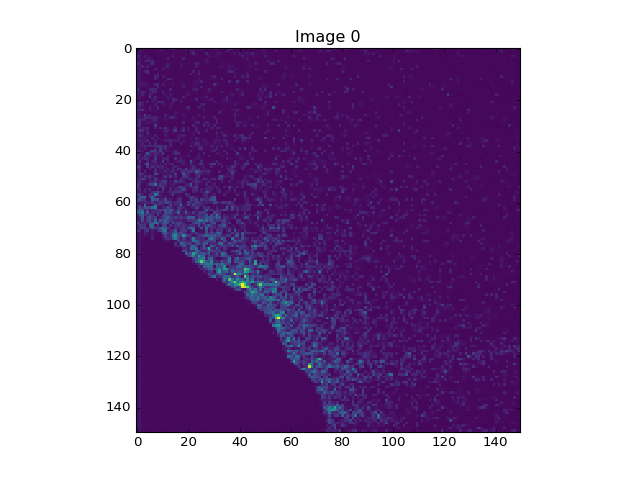

In [3]:
# it would be great to have a link to what this multi-tau scheme is!
num_levels = 7
num_bufs = 8

# load the data
img_stack = np.load("100_500_NIPA_GEL.npy")
fig, ax = plt.subplots()
# plot the first image to make sure the data loaded correctly
ax.imshow(img_stack[0], cmap='viridis', interpolation='nearest')
ax.set_title("NIPA_GEL_250K")
None

In [4]:
browse_images(ax, img_stack)

## Generate ROIs 

In [5]:
# define the ROIs
roi_start = 65 # in pixels
roi_width = 9 # in pixels
roi_spacing = (5.0, 4.0)
x_center = 7. # in pixels
y_center = (129.) # in pixels
num_rings = 3

# get the edges of the rings
edges = roi.ring_edges(roi_start, width=roi_width, 
                       spacing=roi_spacing, num_rings=num_rings)

# get the label array from the ring shaped 3 region of interests(ROI's)
labeled_roi_array = roi.rings(
    edges, (y_center, x_center), img_stack.shape[1:])


## Plot the ROIs

<IPython.core.display.Javascript object>


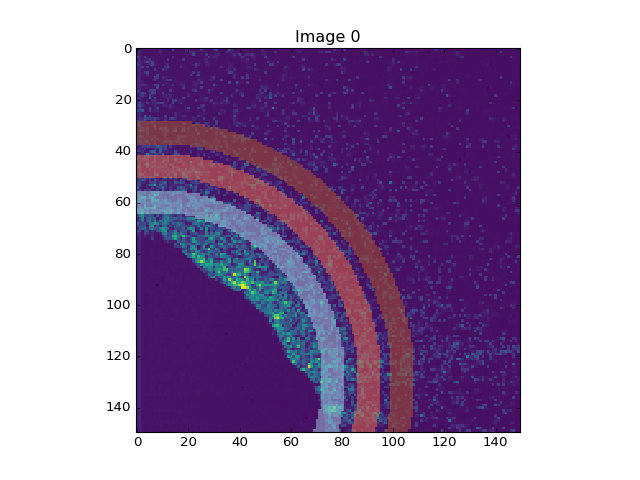

In [6]:
def overlay_rois(ax, image, label_array):
    """
    This will plot the reqiured roi's on the image
    """
    tmp = np.array(label_array, dtype='float')
    tmp[label_array==0] = np.nan
    
    im_data = ax.imshow(image, interpolation='none', norm=LogNorm(), cmap='viridis')
    im_overlay = ax.imshow(tmp, cmap='Paired', 
                   interpolation='nearest', alpha=.5,)
    
    return im_data, im_overlay

fig, ax = plt.subplots()
plt.title("NIPA_GEL_250K")
im_data, im_overlay = overlay_rois(ax, img_stack[0], labeled_roi_array)
plt.show()

In [7]:
browse_images(ax, img_stack, im_data)

## Use the 1-time correlation function in scikit-beam

In [8]:
# g2 one time correlation results for 3 ROI's
g2, lag_steps = corr.multi_tau_auto_corr(
    num_levels, num_bufs, labeled_roi_array, (im for im in img_stack))
# lag_staps are delays for multiple tau analysis
lag_time = 0.001
lag_step = lag_steps[:g2.shape[0]]
lags = lag_step*lag_time

## Plot the one time correlation functions

<IPython.core.display.Javascript object>


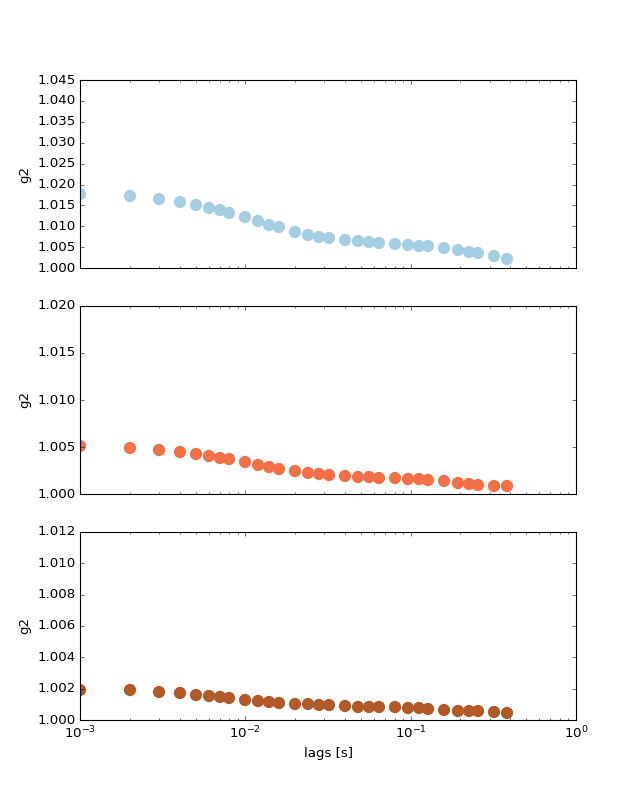

/home/tcaswell/source/mine/matplotlib/lib/matplotlib/lines.py:1107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:
/home/tcaswell/source/mine/matplotlib/lib/matplotlib/lines.py:1083: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


In [9]:
fig, axes = plt.subplots(num_rings, sharex=True, figsize=(8,10))
axes[-1].set_xlabel("lags [s]")

for ax, roi_color, _g2 in zip(axes, cm.get_cmap('Paired')(np.linspace(0, 1, 3)), g2.T):
    ax.set_ylabel("g2") 
    ax.semilogx(lags, _g2, 'o', markerfacecolor=roi_color, markersize=10, markeredgecolor=roi_color)


In [10]:
import skbeam

In [11]:
skbeam.__version__

'0.0.5+27.gb3540c8'